# Ridge Regression. 

## Theory
1. Обозначения

    $a=\left( {{a}_{1}}\text{ }...\text{  }{{a}_{l}} \right)$ - вектор прогнозов модели

    $y=\left( {{y}_{1}}\text{ }...\text{  }{{y}_{l}} \right)$ - вектор ответов

    $X=\left( \begin{align}
     & 1\text{  }{{x}_{11}}\text{ }....\text{  }{{x}_{1d}} \\ 
     & 1\text{      }....... \\ 
     & 1\text{      }....... \\
     & 1\text{  }{{x}_{l1}}\text{ }....\text{   }{{x}_{ld}} \\ 
    \end{align} \right)$ - матрица признаков

    $w=\left( \begin{align}
     & {{w}_{0}} \\ 
     & {{w}_{1}} \\ 
     & ... \\ 
     & {{w}_{d}} \\ 
    \end{align} \right)$ - матрица весов

    $a=Xw=np.dot(X,w)$ - прогноз

    $Q(w,X)=\frac{1}{2l}||Xw-y|{{|}^{2}}+\frac{\lambda }{2}||w|{{|}^{2}}$   - функция ошибки


2. Стандартизация

    ${{\mu }_{j}}=\frac{1}{l}\sum\limits_{i=1}^{l}{x_{i}^{j}}$

    ${{\mu }}=np.mean(X, axis=0)$

    ${{\sigma }_{j}}=\sqrt{\frac{1}{l}\sum\limits_{i=1}^{l}{{{\left( x_{i}^{j}-{{\mu }_{j}} \right)}^{2}}}}$
    
    ${\sigma }=np.std(X, axis=0)$
    
    $X:=\frac{X-{{\mu }}}{{\sigma }}$
    
    
3. Оптимизация

    $Q(w,X)\to \min$
    
    $\frac{\partial Q}{\partial w}=\frac{1}{l}\left( a-y \right)\cdot \frac{\partial a}{\partial w}+\lambda w=\frac{1}{l}\left( a-y \right)X+\lambda w$
 
    $w:=w-\alpha \frac{\partial Q}{\partial w}$
    
    
4. Аналитическое решение

    $\begin{align}
      & Q=||Xw-y|{{|}^{2}}+\lambda ||w|{{|}^{2}}\to \min  \\ 
      & Q={{\left( Xw-y \right)}^{T}}\left( Xw-y \right)+\lambda {{w}^{T}}w \\ 
      & \frac{\partial Q}{\partial w}={{X}^{T}}\left( Xw-y \right)+\lambda w=0 \\ 
      & {{X}^{T}}Xw-{{X}^{T}}y+\lambda w=0 \\ 
      & w={{\left( {{X}^{T}}X+\lambda I \right)}^{-1}}{{X}^{T}}y \\ 
    \end{align}$

    

## Practice

### 1) Import libs and dataset

In [1]:
# Snadard libs
import pandas as pd
import numpy as np
import seaborn as sns
import random
import sys

from sklearn.datasets import load_boston
from sklearn.metrics import r2_score as sklearn_r2
from matplotlib import pyplot as plt

In [2]:
# My libs
sys.path.append('../../')

from ridge import Ridge
from mltools.preprocessing import *
from mltools.metrics import r2_score as my_r2

In [3]:
# Load data
boston_dataset = load_boston()
sns.set()

### 2) Create matrix of features and target vector. Append constant feature

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.insert(0, '__constant', 1)

X = boston.values
y = boston_dataset.target

boston.head()

,__constant,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 3) Train/dev/test split

In [5]:
sets = Splitter().split(X, y)

X_train = sets['train']['X']
X_dev = sets['dev']['X']
X_test = sets['test']['X']

y_train = sets['train']['y']
y_dev = sets['dev']['y']
y_test = sets['test']['y']

### 4) Standartization

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_dev_scale = scaler.transform(X_dev)
X_test_scale = scaler.transform(X_test)

### 5) Model

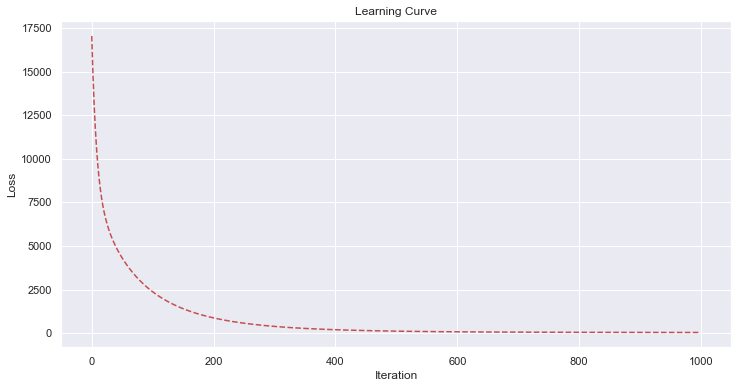

In [7]:
# Init model
ridge = Ridge(alpha=0.1)

# Fit model
ridge.fit(X_train_scale, y_train)

#Plot learning curve
ridge.plot_learning_curve('r--')

### 6) Prediction

In [8]:
y_dev_pred = ridge.predict(X_dev_scale)

### 7) Comparison with sklearn

In [9]:
from sklearn import linear_model

In [10]:
ridge_sklrn = linear_model.Ridge()
ridge_sklrn.fit(X_train_scale, y_train)
y_dev_pred_sklrn = ridge_sklrn.predict(X_dev_scale)

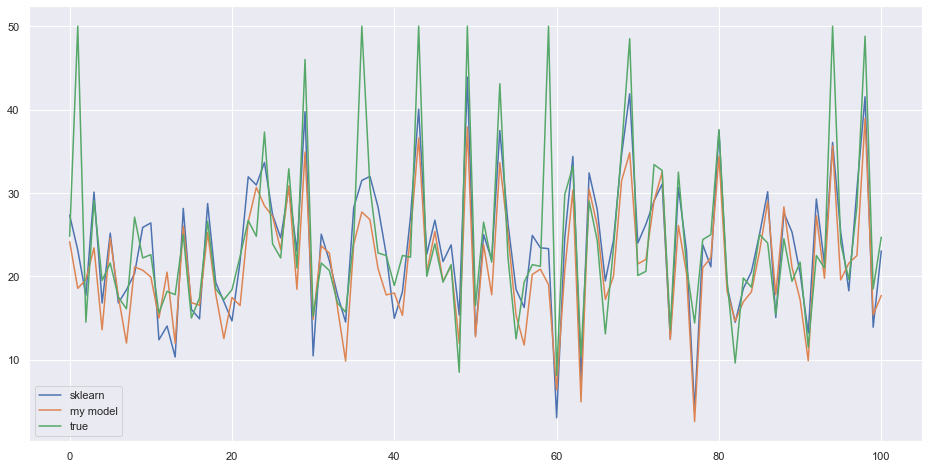

In [11]:
predicted_obj = range(len(y_dev_pred))

plt.figure(figsize=(16,8))
plt.plot(predicted_obj, y_dev_pred_sklrn, label='sklearn')
plt.plot(predicted_obj, y_dev_pred, label='my model')
plt.plot(predicted_obj, y_dev, label='true')
plt.legend()
plt.show()

### 8) R2 score

In [12]:
my_r2(y_dev_pred, y_dev) == sklearn_r2(y_dev_pred, y_dev)

True

In [17]:
r2_model = my_r2(y_dev, y_dev_pred)
r2_sklrn = my_r2(y_dev, y_dev_pred_sklrn)
print(f'R2 score of my model = {r2_model}\nR2 score of sklearn  = {r2_sklrn}')

R2 score of my model = 0.5165075238777247
R2 score of sklearn  = 0.6529426651514108
